In [3]:
import pandas as pd


df_2025 = pd.read_csv('../data/raw/datatran2025.csv', sep=';', encoding='latin1')

df_2025.head()  

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


In [4]:
df_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53213 entries, 0 to 53212
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      53213 non-null  int64 
 1   data_inversa            53213 non-null  object
 2   dia_semana              53213 non-null  object
 3   horario                 53213 non-null  object
 4   uf                      53213 non-null  object
 5   br                      53213 non-null  int64 
 6   km                      53213 non-null  object
 7   municipio               53213 non-null  object
 8   causa_acidente          53213 non-null  object
 9   tipo_acidente           53213 non-null  object
 10  classificacao_acidente  53212 non-null  object
 11  fase_dia                53213 non-null  object
 12  sentido_via             53213 non-null  object
 13  condicao_metereologica  53213 non-null  object
 14  tipo_pista              53213 non-null  object
 15  tr

In [5]:
import glob 

path = '../data/raw/'

all_files = glob.glob(path + "datatran*.csv")

li = []

print(f"Carregando {len(all_files)} arquivos...")
for filename in all_files:
    df = pd.read_csv(filename, sep=';', encoding='latin1', low_memory=False)
    li.append(df)
print("Arquivos carregados.")

df_total = pd.concat(li, axis=0, ignore_index=True)

print(f"Formato do DataFrame total (linhas, colunas): {df_total.shape}")
print(f"Total de acidentes (todos os anos): {df_total.shape[0]}")

df_total.head()

Carregando 5 arquivos...
Arquivos carregados.
Formato do DataFrame total (linhas, colunas): (323308, 30)
Total de acidentes (todos os anos): 323308


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,5,1,1,5,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,0,0,11,2,12,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,0,1,1,1,3,"-22,6687122","-43,01862696",SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,1,1,1,2,3,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ


In [6]:
df_total['km'] = df_total['km'].str.replace(',', '.')
df_total['km'] = pd.to_numeric(df_total['km'], errors='coerce')

print(f"Valores nulos na coluna 'km' após limpeza: {df_total['km'].isnull().sum()}")

Valores nulos na coluna 'km' após limpeza: 0


In [7]:
df_total['data_hora'] = df_total['data_inversa'] + ' ' + df_total['horario']

df_total['data_hora'] = pd.to_datetime(df_total['data_hora'], errors='coerce')

df_total['hora_do_dia'] = df_total['data_hora'].dt.hour
df_total['mes'] = df_total['data_hora'].dt.month
df_total['ano'] = df_total['data_hora'].dt.year

df_total.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,veiculos,latitude,longitude,regional,delegacia,uop,data_hora,hora_do_dia,mes,ano
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021-01-01 05:30:00,5,1,2021
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021-01-01 08:05:00,8,1,2021
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,...,12,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021-01-01 10:10:00,10,1,2021
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,3,"-22,6687122","-43,01862696",SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ,2021-01-01 12:30:00,12,1,2021
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,3,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ,2021-01-01 14:40:00,14,1,2021


Gerando gráfico de acidentes por hora...


<Axes: title={'center': 'Total de Acidentes por Hora do Dia (2021-2025)'}, xlabel='hora_do_dia'>

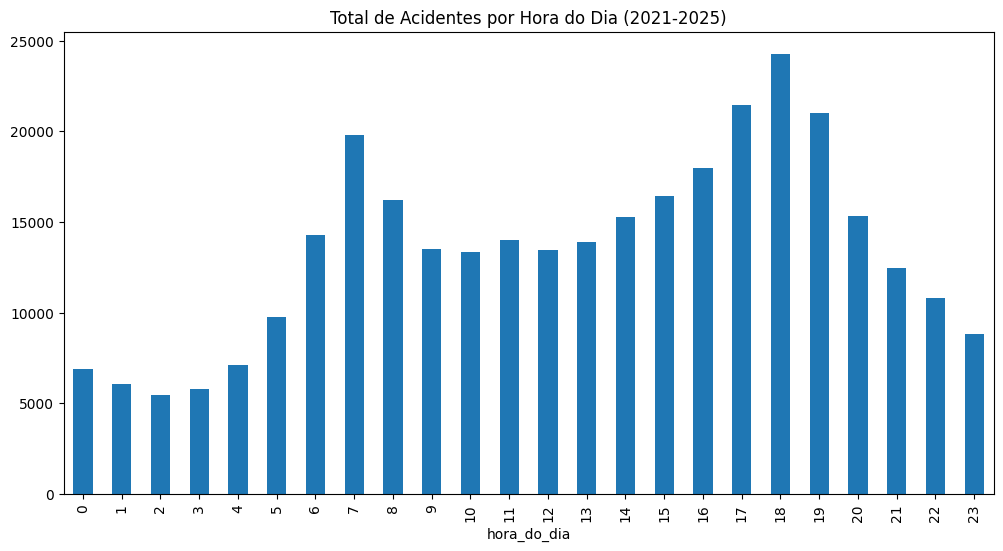

In [9]:
print("Gerando gráfico de acidentes por hora...")
df_total['hora_do_dia'].value_counts().sort_index().plot(kind='bar', 
                                                       figsize=(12,6), 
                                                       title='Total de Acidentes por Hora do Dia (2021-2025)')

In [ ]:
pontos_criticos = df_total.groupby(['uf', 'br', 'km']).size().sort_values(ascending=False)

print("--- Top 10 Pontos Críticos de Acidentes (2021-2025) ---")
print(pontos_criticos.head(10))

--- Top 10 Pontos Críticos de Acidentes (2021-2025) ---
uf  br   km   
SP  116  219.0    276
         227.0    217
         230.0    202
RJ  40   121.0    198
SP  116  225.0    195
         228.0    194
RJ  101  322.0    192
SP  116  223.0    191
RJ  40   109.0    183
SC  101  207.0    180
dtype: int64


In [32]:
import pandas as pd
# Tente carregar o arquivo de POPULAÇÃO com os parâmetros mais agressivos
try:
    df_populacao = pd.read_csv('../data/raw/ibge_populacao_2021.csv', 
                               sep=';', 
                               skiprows=10, # Pula o excesso de metadados
                               header=None, # Diz ao pandas para não procurar cabeçalhos
                               usecols=[1, 2, 3], # Pegamos as colunas por POSIÇÃO (índice 1, 2 e 3)
                               encoding='latin1',
                               engine='python')
    
    # Renomeia as colunas úteis (agora que sabemos a posição delas)
    df_populacao.columns = ['CODIGO_IBGE', 'MUNICIPIO_NOME', 'POPULACAO_2021']
    
    # Remove a linha que contém o nome da variável (se ela existir)
    df_populacao = df_populacao[df_populacao['CODIGO_IBGE'] != 'C2'] 

    print("--- Dados de População FINALMENTE CORRIGIDOS (Primeiras 5 linhas) ---")
    print(df_populacao.head())
    print("\n--- Informações da População FINALMENTE CORRIGIDOS ---")
    df_populacao.info()

except Exception as e:
    print(f"Erro ao carregar população: {e}")

--- Dados de População FINALMENTE CORRIGIDOS (Primeiras 5 linhas) ---
  CODIGO_IBGE         MUNICIPIO_NOME POPULACAO_2021
0     1100072        Corumbiara (RO)           7052
1     1100080     Costa Marques (RO)          19255
2     1100098  EspigÃ£o D'Oeste (RO)          33009
3     1100106    GuajarÃ¡-Mirim (RO)          46930
4     1100114              Jaru (RO)          51469

--- Informações da População FINALMENTE CORRIGIDOS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741 entries, 0 to 5740
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CODIGO_IBGE     5572 non-null   object
 1   MUNICIPIO_NOME  5565 non-null   object
 2   POPULACAO_2021  5565 non-null   object
dtypes: object(3)
memory usage: 134.7+ KB


In [33]:
import pandas as pd

try:
    # header=3 diz ao pandas para usar a QUARTA linha (índice 3) como cabeçalho
    # Isso vai colocar MUNICÍPIO, TOTAL, AUTOMÓVEL como nomes das colunas
    df_frota = pd.read_excel('../data/raw/frota_2021.xls', sheet_name=0, header=3)
    
    # Vamos inspecionar o resultado (as colunas devem estar certas)
    print("--- Dados de Frota (Header Corrigido) ---")
    print(df_frota.head())
    df_frota.info()

except Exception as e:
    print(f"Erro ao carregar frota: {e}")

--- Dados de Frota (Header Corrigido) ---
   UF     MUNICIPIO  TOTAL  AUTOMOVEL  BONDE  CAMINHAO  CAMINHAO TRATOR  \
0  AC    ACRELANDIA   7204       1586      0       480               40   
1  AC  ASSIS BRASIL   2075        373      0        27                0   
2  AC     BRASILEIA  11294       2683      0       331              216   
3  AC        BUJARI   2442        713      0       128               39   
4  AC      CAPIXABA   2497        696      0        93                5   

   CAMINHONETE  CAMIONETA  CHASSI PLATAF  ...  ONIBUS  QUADRICICLO  REBOQUE  \
0          817         59              0  ...      43            0       93   
1          182         21              0  ...       4            0       19   
2         1484        114              0  ...      21            0      147   
3          294         15              0  ...      14            0       29   
4          271         24              0  ...      17            0       31   

   SEMI-REBOQUE  SIDE-CAR  OUTRO

In [35]:
# Célula 1: Limpeza de Tipos da População
# O código IBGE e a População devem ser números inteiros (int)
df_populacao['CODIGO_IBGE'] = df_populacao['CODIGO_IBGE'].astype(str).str.strip()
df_populacao['POPULACAO_2021'] = pd.to_numeric(df_populacao['POPULACAO_2021'], errors='coerce').fillna(0).astype(int)

print("População: Tipos de dados corrigidos.")
df_populacao.info()

População: Tipos de dados corrigidos.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741 entries, 0 to 5740
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CODIGO_IBGE     5741 non-null   object
 1   MUNICIPIO_NOME  5565 non-null   object
 2   POPULACAO_2021  5741 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 134.7+ KB


In [36]:
# Célula 2: Limpeza da Frota
# 1. A linha 0 é um cabeçalho duplicado (lixo) - vamos removê-la
df_frota = df_frota.drop(df_frota.index[0]) 

# 2. Renomear para facilitar o JOIN
df_frota.rename(columns={'MUNICÍPIO': 'MUNICIPIO_FROTA', 'TOTAL': 'FROTA_TOTAL_2021'}, inplace=True)

# 3. Converter a coluna TOTAL para número
# O errors='coerce' transforma qualquer lixo (como '...', ou strings) em Nulo
df_frota['FROTA_TOTAL_2021'] = pd.to_numeric(df_frota['FROTA_TOTAL_2021'], errors='coerce')

print("Frota: Colunas renomeadas e 'TOTAL' convertido.")
df_frota.head()

Frota: Colunas renomeadas e 'TOTAL' convertido.


,UF,MUNICIPIO,FROTA_TOTAL_2021,AUTOMOVEL,BONDE,CAMINHAO,CAMINHAO TRATOR,CAMINHONETE,CAMIONETA,CHASSI PLATAF,...,ONIBUS,QUADRICICLO,REBOQUE,SEMI-REBOQUE,SIDE-CAR,OUTROS,TRATOR ESTEI,TRATOR RODAS,TRICICLO,UTILITARIO
1,AC,ASSIS BRASIL,2075,373,0,27,0,182,21,0,...,4,0,19,0,0,0,0,0,0,3
2,AC,BRASILEIA,11294,2683,0,331,216,1484,114,0,...,21,0,147,282,0,0,0,0,2,36
3,AC,BUJARI,2442,713,0,128,39,294,15,0,...,14,0,29,46,0,0,0,0,1,3
4,AC,CAPIXABA,2497,696,0,93,5,271,24,0,...,17,0,31,8,0,0,0,0,0,2
5,AC,CRUZEIRO DO SUL,36602,7695,0,737,99,3179,349,1,...,86,0,60,200,0,1,0,0,8,138


In [37]:
import requests
import pandas as pd
import os
import json
import urllib3

# Desabilita o aviso de SSL (como fizemos antes)
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# URL da API de Localidades do IBGE para buscar todos os municípios
URL_LOCALIDADES = "https://servicodados.ibge.gov.br/api/v1/localidades/municipios"
MUNICIPIOS_PATH = '../data/raw/ibge_municipios_oficial.csv'

def fetch_ibge_municipios():
    print("Iniciando coleta da Tabela Oficial de Municípios do IBGE...")
    
    if os.path.exists(MUNICIPIOS_PATH):
        print("Arquivo de municípios já existe. Carregando...")
        return pd.read_csv(MUNICIPIOS_PATH)

    try:
        response = requests.get(URL_LOCALIDADES, verify=False)
        response.raise_for_status() # Verifica se houve erro HTTP
        
        municipios_data = response.json()
        
        municipios_list = []
        for municipio in municipios_data:
            uf_sigla = None
            # Adiciona verificações defensivas em cada nível da estrutura
            if municipio.get('microrregiao'):
                mesorregiao = municipio['microrregiao'].get('mesorregiao')
                if mesorregiao:
                    uf_obj = mesorregiao.get('UF')
                    if uf_obj:
                        uf_sigla = uf_obj.get('sigla') # Agora só acessa se o UF existir
            
            municipios_list.append({
                'CODIGO_IBGE_7DIGITOS': municipio['id'],
                'NOME_MUNICIPIO_OFICIAL': municipio['nome'],
                'UF': uf_sigla  # Se falhou, a UF será None, mas o script continua rodando
            })
            
        df_municipios = pd.DataFrame(municipios_list)
        
        # Salva o arquivo CSV na pasta raw
        df_municipios.to_csv(MUNICIPIOS_PATH, index=False, encoding='utf-8')
        print("Tabela Oficial de Municípios salva com sucesso!")
        
        return df_municipios

    except requests.RequestException as e:
        print(f"Erro ao acessar a API de Localidades do IBGE: {e}")
        return None

# Célula de execução
df_ibge_oficial = fetch_ibge_municipios()

if df_ibge_oficial is not None:
    print("\n--- Tabela de Lookup do IBGE (Primeiras 5 linhas) ---")
    print(df_ibge_oficial.head())
    print("\n--- Informações da Tabela de Lookup ---")
    df_ibge_oficial.info()

# Célula de execução
df_ibge_oficial = fetch_ibge_municipios()

if df_ibge_oficial is not None:
    print("\n--- Tabela de Lookup do IBGE (Primeiras 5 linhas) ---")
    print(df_ibge_oficial.head())
    print("\n--- Informações da Tabela de Lookup ---")
    df_ibge_oficial.info()

Iniciando coleta da Tabela Oficial de Municípios do IBGE...
Arquivo de municípios já existe. Carregando...

--- Tabela de Lookup do IBGE (Primeiras 5 linhas) ---
   CODIGO_IBGE_7DIGITOS NOME_MUNICIPIO_OFICIAL  UF
0               1100015  Alta Floresta D'Oeste  RO
1               1100023              Ariquemes  RO
2               1100031                 Cabixi  RO
3               1100049                 Cacoal  RO
4               1100056             Cerejeiras  RO

--- Informações da Tabela de Lookup ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CODIGO_IBGE_7DIGITOS    5571 non-null   int64 
 1   NOME_MUNICIPIO_OFICIAL  5571 non-null   object
 2   UF                      5570 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
Iniciando coleta da Tabela Oficial de Municípios do IBGE...
Arquivo de mu

In [38]:
# Célula de limpeza que DEVE rodar antes do merge

# 1. A linha 0 é um cabeçalho duplicado (lixo) - vamos removê-la
df_frota = df_frota.drop(df_frota.index[0]) 

# 2. Renomear para facilitar o JOIN (Esta linha é a crucial que está faltando)
df_frota.rename(columns={'MUNICÍPIO': 'MUNICIPIO_FROTA', 'TOTAL': 'FROTA_TOTAL_2021'}, inplace=True)

# 3. Converter a coluna TOTAL para número
df_frota['FROTA_TOTAL_2021'] = pd.to_numeric(df_frota['FROTA_TOTAL_2021'], errors='coerce')

print("Frota: Colunas renomeadas e 'TOTAL' convertido.")
df_frota.head()

Frota: Colunas renomeadas e 'TOTAL' convertido.


,UF,MUNICIPIO,FROTA_TOTAL_2021,AUTOMOVEL,BONDE,CAMINHAO,CAMINHAO TRATOR,CAMINHONETE,CAMIONETA,CHASSI PLATAF,...,ONIBUS,QUADRICICLO,REBOQUE,SEMI-REBOQUE,SIDE-CAR,OUTROS,TRATOR ESTEI,TRATOR RODAS,TRICICLO,UTILITARIO
2,AC,BRASILEIA,11294,2683,0,331,216,1484,114,0,...,21,0,147,282,0,0,0,0,2,36
3,AC,BUJARI,2442,713,0,128,39,294,15,0,...,14,0,29,46,0,0,0,0,1,3
4,AC,CAPIXABA,2497,696,0,93,5,271,24,0,...,17,0,31,8,0,0,0,0,0,2
5,AC,CRUZEIRO DO SUL,36602,7695,0,737,99,3179,349,1,...,86,0,60,200,0,1,0,0,8,138
6,AC,EPITACIOLANDIA,7401,2052,0,302,112,1013,97,0,...,16,0,114,165,0,0,0,0,3,15


In [39]:
# Célula de Limpeza do Nome do Município (DEVE RODAR ANTES DO MERGE)

# Remove o sufixo (UF) da coluna de nome do município da população
# (Substitui "(RO)", "(AC)", etc., por uma string vazia)
df_populacao['MUNICIPIO_NOME'] = df_populacao['MUNICIPIO_NOME'].astype(str).str.replace(r'\(..?\)', '', regex=True).str.strip()

print("Colunas de nome de município da População limpas.")
df_populacao.head()

Colunas de nome de município da População limpas.


,CODIGO_IBGE,MUNICIPIO_NOME,POPULACAO_2021
0,1100072,Corumbiara,7052
1,1100080,Costa Marques,19255
2,1100098,EspigÃ£o D'Oeste,33009
3,1100106,GuajarÃ¡-Mirim,46930
4,1100114,Jaru,51469


In [40]:
# --- PARTE 1: CRIANDO A TABELA DE FEATURES (POPULAÇÃO + FROTA) ---

# 1. Limpar a coluna CODIGO_IBGE da População e converter para 7 dígitos (int)
# (Este código é o que resolveu o problema da string 'Signifi')
df_populacao['CODIGO_IBGE_7DIGITOS'] = (
    df_populacao['CODIGO_IBGE']
    .fillna(0) # Preenche valores nulos com 0
    .astype(str)
    .str[:7]    # Pega os primeiros 7 caracteres (o código IBGE)
    .str.strip() # Remove espaços
    .replace('None', '0', regex=False)
    .replace('', '0', regex=False)
)

# NOVO PASSO AGRESSIVO: Remove linhas com lixo (como 'Signifi')
df_populacao = df_populacao[df_populacao['CODIGO_IBGE_7DIGITOS'].astype(str).str.match(r'^\d{7}$')]
df_populacao['CODIGO_IBGE_7DIGITOS'] = df_populacao['CODIGO_IBGE_7DIGITOS'].astype(int)

# 2. Renomear o DF de Frota para limpar o código IBGE (Cria a coluna de JOIN)
df_frota['MUNICIPIO_FROTA_LIMPO'] = df_frota['MUNICIPIO'].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.strip()

# 3. Criar uma versão LIMPA da tabela oficial para o JOIN
df_ibge_oficial['NOME_MUNICIPIO_OFICIAL_LIMPO'] = df_ibge_oficial['NOME_MUNICIPIO_OFICIAL'].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.strip()


# 4. MERGE (JUNÇÃO) POPULAÇÃO E FROTA
# Usamos o MUNICIPIO_NOME da População para juntar com a Frota (Merge por nome)
df_features = pd.merge(df_populacao, 
                       df_frota[['MUNICIPIO_FROTA_LIMPO', 'FROTA_TOTAL_2021']], 
                       left_on='MUNICIPIO_NOME', 
                       right_on='MUNICIPIO_FROTA_LIMPO',
                       how='left')

# 5. Adicionar informações oficiais do IBGE (UF e nome correto)
# Faz o merge final com a tabela oficial para trazer o UF e o código IBGE oficial
df_features = pd.merge(df_features,
                       df_ibge_oficial[['CODIGO_IBGE_7DIGITOS', 'UF']],
                       on='CODIGO_IBGE_7DIGITOS',
                       how='left')

# Exibir o resultado da tabela de features
print("--- Tabela Final de Features (População + Frota) ---")
print(f"Total de linhas (municípios): {df_features.shape[0]}")
print(df_features[['CODIGO_IBGE_7DIGITOS', 'MUNICIPIO_NOME', 'POPULACAO_2021', 'FROTA_TOTAL_2021', 'UF']].head())
df_features.info()

--- Tabela Final de Features (População + Frota) ---
Total de linhas (municípios): 5565
   CODIGO_IBGE_7DIGITOS    MUNICIPIO_NOME  POPULACAO_2021  FROTA_TOTAL_2021  \
0               1100072        Corumbiara            7052               NaN   
1               1100080     Costa Marques           19255               NaN   
2               1100098  EspigÃ£o D'Oeste           33009               NaN   
3               1100106    GuajarÃ¡-Mirim           46930               NaN   
4               1100114              Jaru           51469               NaN   

   UF  
0  RO  
1  RO  
2  RO  
3  RO  
4  RO  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CODIGO_IBGE            5565 non-null   object 
 1   MUNICIPIO_NOME         5565 non-null   object 
 2   POPULACAO_2021         5565 non-null   int64  
 3   CODIGO_IBGE_7DIGIT

In [42]:
import pandas as pd
import numpy as np
import requests
import glob
import os
import json
import urllib3
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score
pd.set_option('display.max_columns', None)

# --- 0. CONFIGURAÇÃO E CARREGAMENTO DE BASES ---
# Desabilita o aviso de SSL para API do IBGE
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
RAW_DATA_PATH = '../data/raw/'
MUNICIPIOS_PATH = RAW_DATA_PATH + 'ibge_municipios_oficial.csv'
URL_LOCALIDADES = "https://servicodados.ibge.gov.br/api/v1/localidades/municipios"

# CARREGA DATAFRAME DA PRF (ACIDENTES)
print("1. Carregando dados PRF (datatran)...")
all_files = glob.glob(RAW_DATA_PATH + "datatran*.csv")
li = [pd.read_csv(filename, sep=';', encoding='latin1', low_memory=False) for filename in all_files]
df_total = pd.concat(li, axis=0, ignore_index=True)

# Limpeza e Feature Engineering Básica no DF_TOTAL
df_total['km'] = pd.to_numeric(df_total['km'].astype(str).str.replace(',', '.'), errors='coerce')
df_total['data_hora'] = pd.to_datetime(df_total['data_inversa'] + ' ' + df_total['horario'], errors='coerce')
df_total['ano'] = df_total['data_hora'].dt.year


# CARREGA POPULAÇÃO (IBGE - SIDRA)
print("2. Carregando dados de População...")
df_populacao = pd.read_csv(RAW_DATA_PATH + 'ibge_populacao_2021.csv', sep=';', skiprows=10, header=None, usecols=[1, 2, 3], encoding='latin1', engine='python')
df_populacao.columns = ['CODIGO_IBGE', 'MUNICIPIO_NOME', 'POPULACAO_2021']

# CARREGA FROTA (SENATRAN - Excel)
print("3. Carregando dados de Frota...")
df_frota = pd.read_excel(RAW_DATA_PATH + 'frota_2021.xls', sheet_name=0, header=3)
df_frota.rename(columns={'MUNICÍPIO': 'MUNICIPIO_FROTA', 'TOTAL': 'FROTA_TOTAL_2021'}, inplace=True)
df_frota = df_frota.drop(df_frota.index[0]) # Remove linha lixo
df_frota['FROTA_TOTAL_2021'] = pd.to_numeric(df_frota['FROTA_TOTAL_2021'], errors='coerce')


# CARREGA TABELA OFICIAL DE LOOKUP (API IBGE LOCALIDADES)
print("4. Coletando/Carregando Tabela de Lookup IBGE...")
def fetch_ibge_municipios():
    if os.path.exists(MUNICIPIOS_PATH): return pd.read_csv(MUNICIPIOS_PATH)
    response = requests.get(URL_LOCALIDADES, verify=False); response.raise_for_status()
    municipios_data = response.json()
    municipios_list = [{'CODIGO_IBGE_7DIGITOS': m['id'], 'NOME_MUNICIPIO_OFICIAL': m['nome'], 'UF': m['microrregiao']['mesorregiao']['UF']['sigla']} for m in municipios_data if m.get('microrregiao') and m['microrregiao'].get('mesorregiao') and m['microrregiao']['mesorregiao'].get('UF')]
    df_m = pd.DataFrame(municipios_list)
    df_m.to_csv(MUNICIPIOS_PATH, index=False, encoding='utf-8')
    return df_m

df_ibge_oficial = fetch_ibge_municipios()


# --- 5. JUNÇÃO DOS DADOS (MERGE) ---

# Limpeza Final de População (remove o sufixo (UF) e o lixo)
df_populacao['MUNICIPIO_NOME'] = df_populacao['MUNICIPIO_NOME'].astype(str).str.replace(r'\(..?\)', '', regex=True).str.strip()
df_populacao['CODIGO_IBGE_7DIGITOS'] = df_populacao['CODIGO_IBGE'].astype(str).str[:7].str.strip().replace('None', '0', regex=False).replace('', '0', regex=False)
df_populacao = df_populacao[df_populacao['CODIGO_IBGE_7DIGITOS'].astype(str).str.match(r'^\d{7}$')].copy() # Filtro Agressivo
df_populacao['CODIGO_IBGE_7DIGITOS'] = df_populacao['CODIGO_IBGE_7DIGITOS'].astype(int)
df_populacao_clean = df_populacao[['CODIGO_IBGE_7DIGITOS', 'POPULACAO_2021']].drop_duplicates(subset=['CODIGO_IBGE_7DIGITOS'])


# Prepara Chaves de Junção
df_ibge_oficial['NOME_MUNICIPIO_OFICIAL_LIMPO'] = df_ibge_oficial['NOME_MUNICIPIO_OFICIAL'].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.strip()
df_total['MUNICIPIO_UF'] = df_total['municipio'].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.strip() + '-' + df_total['uf']
df_ibge_oficial['MUNICIPIO_UF'] = df_ibge_oficial['NOME_MUNICIPIO_OFICIAL_LIMPO'] + '-' + df_ibge_oficial['UF']


# Merge Acidentes (DF_TOTAL) com Lookup (Para adicionar o CODIGO_IBGE)
df_total_mapped = pd.merge(df_total,
                         df_ibge_oficial[['CODIGO_IBGE_7DIGITOS', 'MUNICIPIO_UF']].drop_duplicates(subset=['MUNICIPIO_UF']),
                         on='MUNICIPIO_UF',
                         how='left')


# Merge Final: Acidentes + População (Criando DF_FINAL)
df_final = pd.merge(df_total_mapped,
                    df_populacao_clean,
                    on='CODIGO_IBGE_7DIGITOS',
                    how='left')
                    
# Limpeza final e Variável Alvo
df_final['POPULACAO_2021'] = df_final['POPULACAO_2021'].fillna(0)
df_final['ACIDENTE_GRAVE'] = np.where(df_final['feridos_graves'] > 0, 1, 0)

print("\n--- DATAFRAME FINAL PRONTO PARA ML (Acidentes + População) ---")
print(f"Total de acidentes mapeados: {df_final.shape[0]}")
df_final.info()

1. Carregando dados PRF (datatran)...
2. Carregando dados de População...
3. Carregando dados de Frota...
4. Coletando/Carregando Tabela de Lookup IBGE...

--- DATAFRAME FINAL PRONTO PARA ML (Acidentes + População) ---
Total de acidentes mapeados: 323308
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323308 entries, 0 to 323307
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      323308 non-null  float64       
 1   data_inversa            323308 non-null  object        
 2   dia_semana              323308 non-null  object        
 3   horario                 323308 non-null  object        
 4   uf                      323308 non-null  object        
 5   br                      323308 non-null  int64         
 6   km                      323308 non-null  float64       
 7   municipio               323308 non-null  object        
 8   causa_acidente     

In [44]:
# CÉLULA DE RECONSTRUÇÃO DA FEATURE PERDIDA

# Recria a coluna 'hora_do_dia' usando a coluna 'data_hora' que está no df_final
df_final['hora_do_dia'] = df_final['data_hora'].dt.hour

# Opcional: Verifica se a coluna foi criada
print("Coluna 'hora_do_dia' criada com sucesso.")
df_final[['data_hora', 'hora_do_dia']].head()

Coluna 'hora_do_dia' criada com sucesso.


,data_hora,hora_do_dia
0,2021-01-01 05:30:00,5
1,2021-01-01 08:05:00,8
2,2021-01-01 10:10:00,10
3,2021-01-01 12:30:00,12
4,2021-01-01 14:40:00,14


In [47]:
# CÉLULA DE CONVERSÃO FINAL PARA XGBOOST

# Lista de colunas que o XGBoost precisa como números
cols_to_numeric = ['km', 'br', 'veiculos', 'POPULACAO_2021'] 

# Garante que todas as features numéricas sejam float (o tipo mais seguro para o ML)
for col in cols_to_numeric:
    # Coerce errors e fill NaNs with 0 (para os casos não mapeados)
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce').fillna(0).astype(np.float64)

print("Conversão de tipos concluída para XGBoost.")

Conversão de tipos concluída para XGBoost.


In [48]:
# CÉLULA 2: TREINAMENTO ML E PLN

# 1. Seleção de Features
features = [
    'km', 
    'br', 
    'uf', 
    'POPULACAO_2021', 
    'veiculos', 
    'tipo_pista', 
    'causa_acidente', 
    'condicao_metereologica', 
    'tracado_via',
    'hora_do_dia' # Agora esta feature existe!
]

# 2. Conversão de Variáveis Categóricas (One-Hot Encoding)
X = pd.get_dummies(df_final[features], 
                   columns=['uf', 'tipo_pista', 'causa_acidente', 'condicao_metereologica', 'tracado_via'], 
                   dummy_na=False, 
                   drop_first=True)
y = df_final['ACIDENTE_GRAVE']

# 3. Divisão de Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

# 4. Treinamento do Modelo (XGBoost Classifier)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. Predição e Métricas
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\n--- RESULTADOS DO MACHINE LEARNING (Complexidade Técnica) ---")
print(f"Modelo: XGBoost Classifier")
print(f"Métrica AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# 6. Processamento de Linguagem Natural (PLN)
print("\n--- INDICADORES CHAVE (PLN) para o Relatório ---")
causas_principais = df_final['causa_acidente'].value_counts().head(5)
print(causas_principais)

/home/pdantas/Faculdade/inteligencia-artificial/sistema_prevencao_acidentes/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:00:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- RESULTADOS DO MACHINE LEARNING (Complexidade Técnica) ---
Modelo: XGBoost Classifier
Métrica AUC-ROC: 0.6436

--- INDICADORES CHAVE (PLN) para o Relatório ---
causa_acidente
Reação tardia ou ineficiente do condutor                     44018
Ausência de reação do condutor                               41415
Acessar a via sem observar a presença dos outros veículos    29322
Velocidade Incompatível                                      23316
Condutor deixou de manter distância do veículo da frente     21428
Name: count, dtype: int64


In [50]:
import os

# 1. Define o caminho e o diretório
file_path = '../data/processed/df_final_ml.csv'
directory = os.path.dirname(file_path)

# 2. CRIA O DIRETÓRIO SE ELE NÃO EXISTIR
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Diretório criado: {directory}")

# 3. Salva o DataFrame final
df_final.to_csv(file_path, index=False, encoding='utf-8')

print("\nDataFrame final salvo com sucesso na pasta processed!")

Diretório criado: ../data/processed

DataFrame final salvo com sucesso na pasta processed!
